# 1. Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline
features = ['X1', 'X2', 'X3', 'X4','X5', 'X6', 'X7', 'X8', 'X9'] 
f_len = len(features)

# 2. Импорт данных

In [2]:
data = pd.read_excel('ЛР 1.xlsx', index_col='Регион').loc[:, features]

data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,16.4,4.6,48,145.9,7.7,109.965043,17.5,25.3,5.8
Амурская область,16.1,5.6,66,210.4,17.6,105.292216,15.2,26.0,7.0
Архангельская область,14.6,4.6,60,502.8,17.1,123.723003,12.3,28.9,5.8
Астраханская область,13.6,5.0,32,213.6,11.3,115.365938,15.6,25.0,5.4
Белгородская область,15.5,4.3,29,184.4,10.9,143.912232,7.2,32.9,6.3


## 3. Стандартизация данных

In [3]:
scaled = (data - data.mean(axis=0))/data.std()
scaled

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,0.634962,0.138221,-0.105126,-0.531088,-0.310194,-0.605786,0.712647,-0.421795,-0.188867
Амурская область,0.540716,1.606817,1.043752,-0.040219,0.074576,-0.857647,0.256749,-0.249427,0.951041
Архангельская область,0.069484,0.138221,0.660793,2.185057,0.055144,0.135756,-0.318079,0.464670,-0.188867
Астраханская область,-0.244671,0.725659,-1.126351,-0.015865,-0.170278,-0.314682,0.336035,-0.495667,-0.568836
Белгородская область,0.352223,-0.302358,-1.317831,-0.238089,-0.185824,1.223937,-1.328984,1.449631,0.286094
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-2.569417,-2.945831,-2.275230,-1.364425,-0.566708,2.031140,1.287475,-1.652996,-0.948805
Чувашская Республика,0.320808,-1.330375,0.277833,-0.727436,-0.527842,-0.226039,0.573895,0.440046,-1.328775
Чукотский автономный округ,-1.249967,0.138221,1.490538,-0.827132,0.727520,-2.350976,-1.170411,-0.717283,0.001118


# 4. Построение дендрограмм

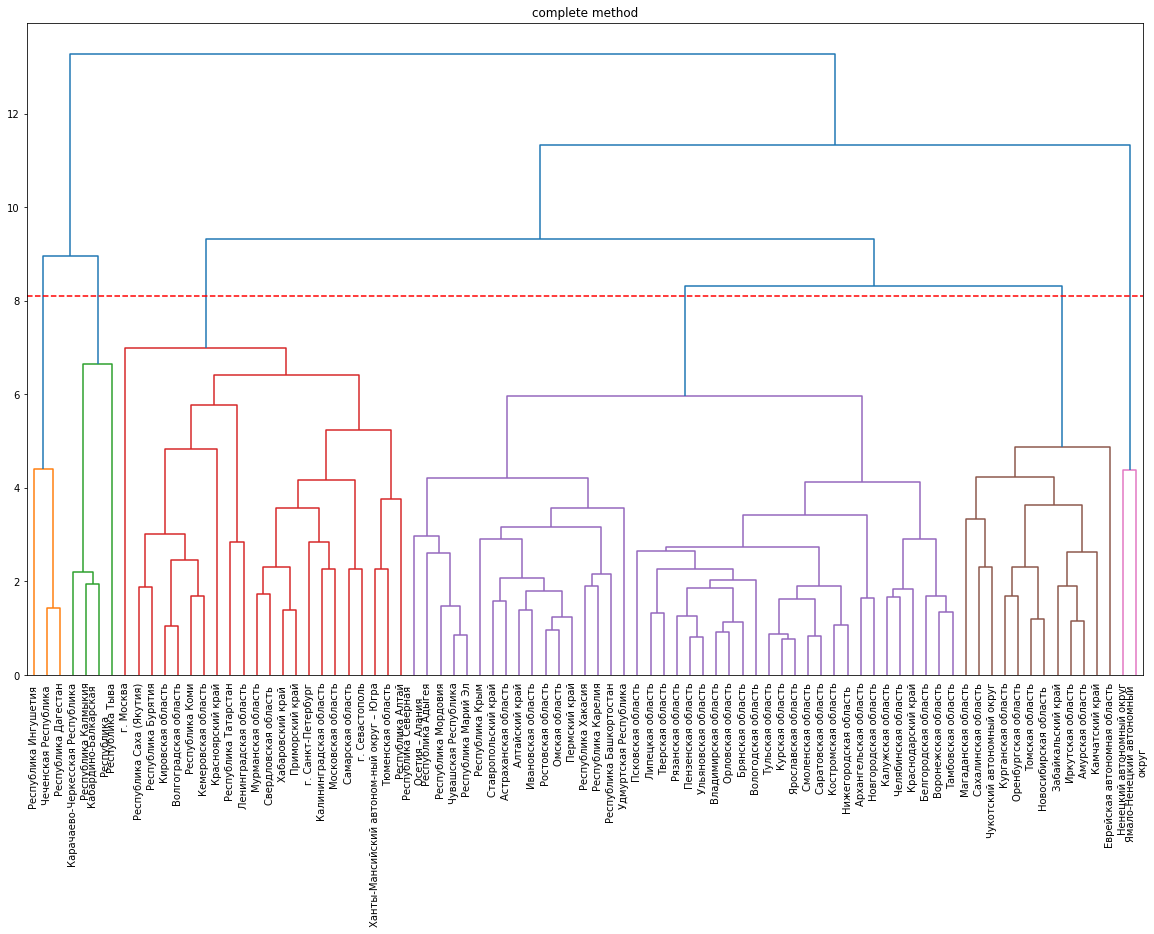

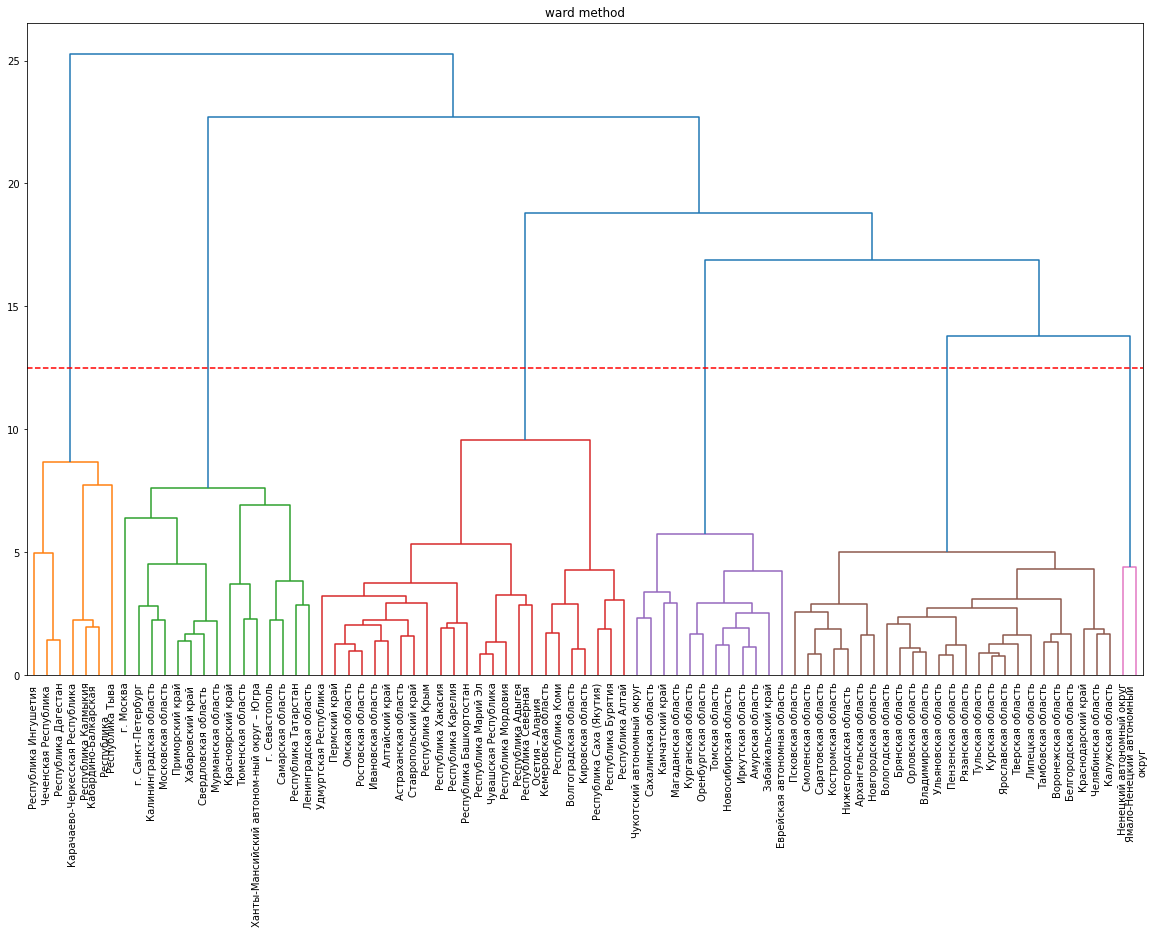

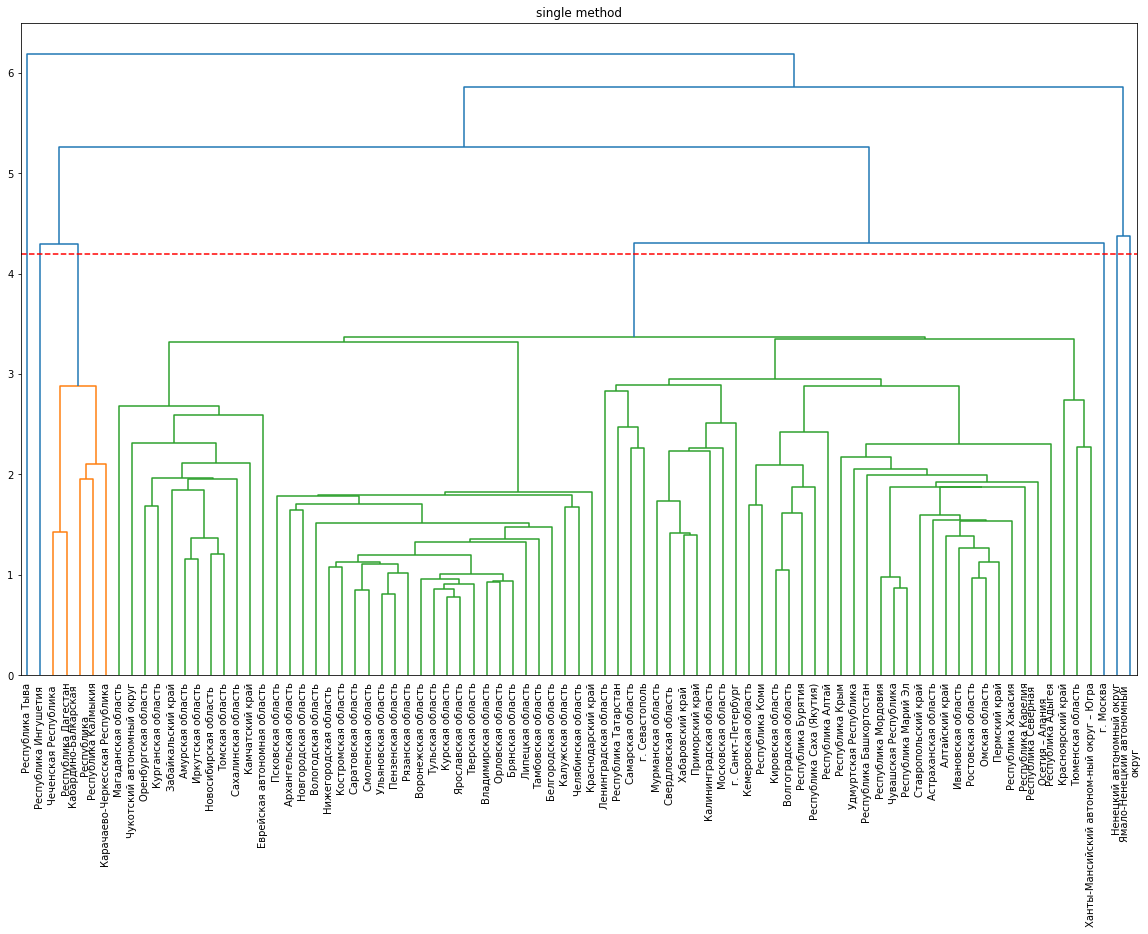

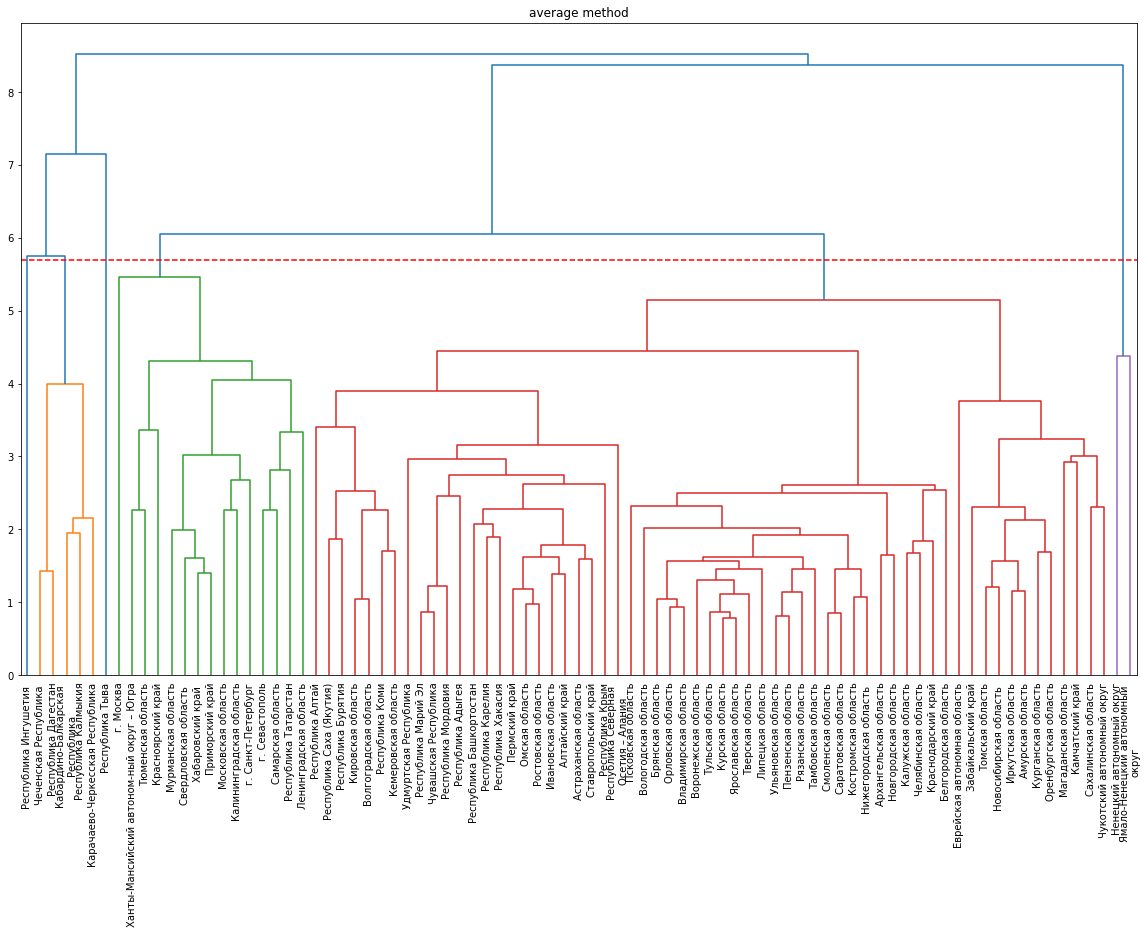

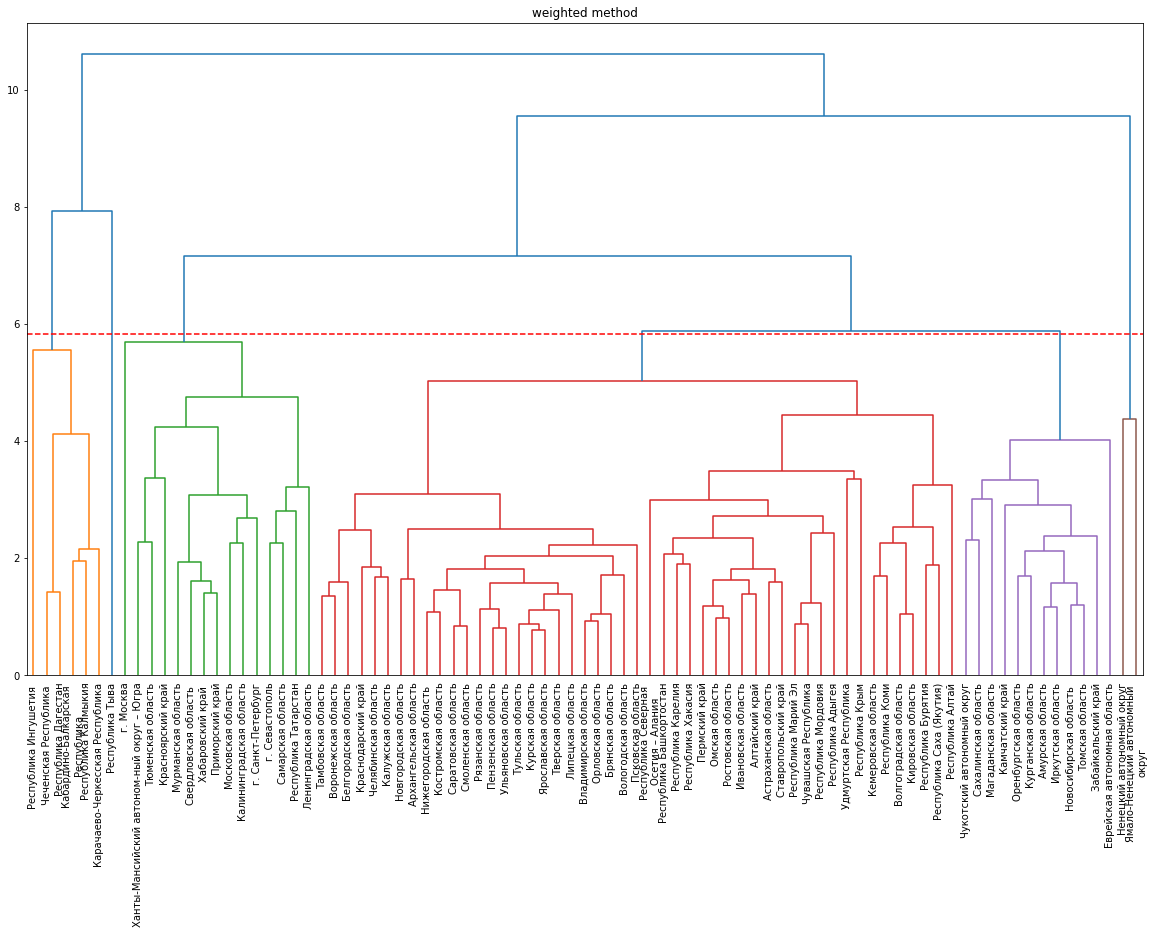

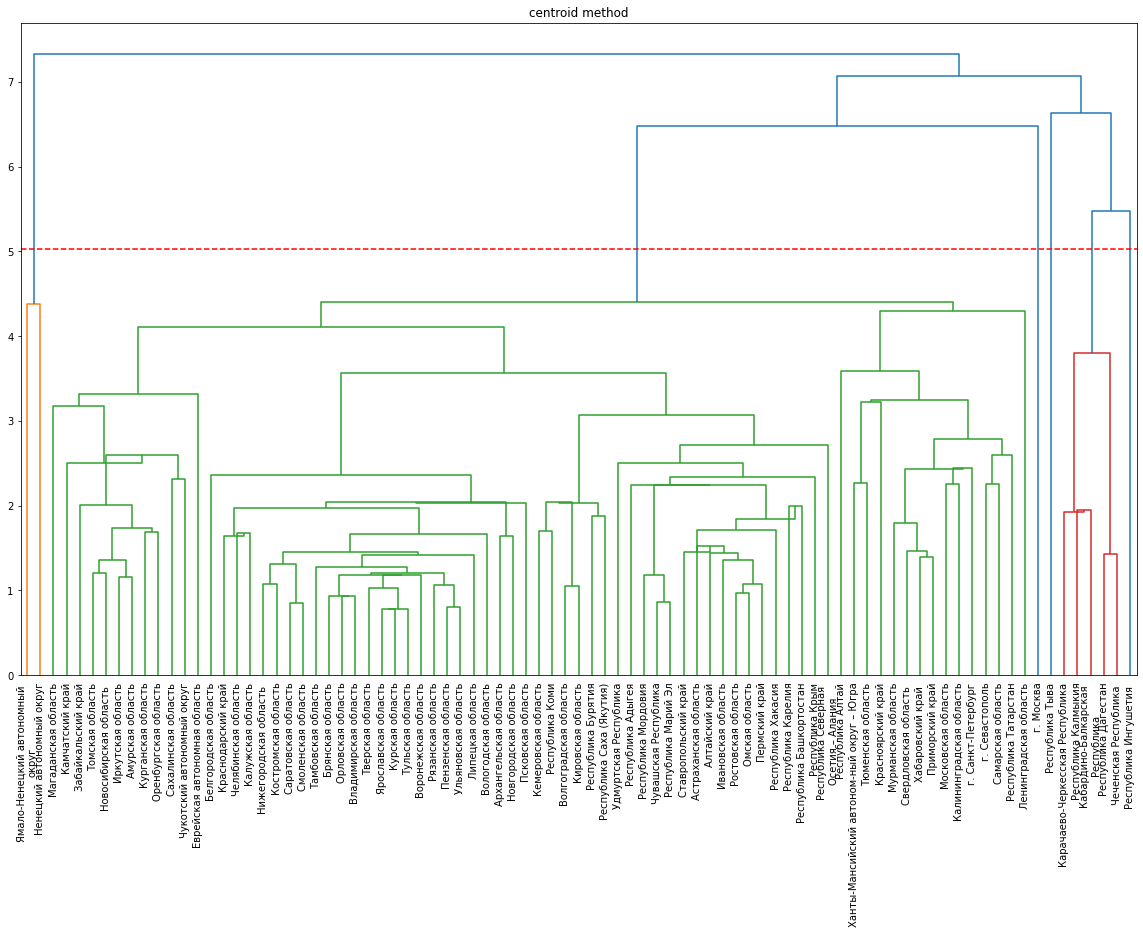

In [41]:
#нужно удалить методы, которые вам не нужны
CLUSTER_METHODS = ["complete", "ward", "single", "average", "weighted", "centroid"]
def dendra(data,method,threshold):
  Z = hierarchy.linkage(data, method=method, optimal_ordering=True)
  plt.figure(figsize=(20,12)) 
  hierarchy.dendrogram(Z, labels=data.index, leaf_font_size=10,color_threshold=threshold) 
  plt.axhline(y=threshold, color='r', linestyle='--')
  plt.title('{} method'.format(method))
#здесь задаем свои пороговые значения и удаляем строки с теми методами, которые вы не использлвали в своей ЛР
dendra(scaled,'complete',8.1) 
dendra(scaled,"ward",12.5)
dendra(scaled,"single",4.2)
dendra(scaled,"average",5.70)
dendra(scaled,"weighted",5.82)
dendra(scaled,"centroid",5.03)

## 5. Кластеризация.

In [59]:
#удаляете ненужные методы
CLUSTER_METHODS = ["complete", "ward", "kmeans", "single", "average", "weighted"]
N_CLUSTERS = {
    "complete" : 6,
    "ward"     : 6,
    "kmeans"  : 6,
    "single" : 6,
    "average" : 6,
    "weighted" : 6,
}
#метод полных связей
complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled)
print("complete\n",complete.labels_+1,"\n")

#метод Ward'a
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled)
print("ward\n",ward.labels_+1,"\n")

#метод k-means
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'])
kmeans.fit(scaled)
print("kmeans\n",kmeans.labels_+1,"\n")

#метод одиночных связей
single = AgglomerativeClustering(n_clusters=N_CLUSTERS['single'], linkage='single')
single.fit(scaled)
print("single\n",single.labels_+1,"\n")

#метод невзвешенного попарного среднего
average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
average.fit(scaled)
print("average\n", average.labels_+1,"\n")

#метод взвешенного попарного среднего
z = scipy.cluster.hierarchy.weighted(scipy.spatial.distance.pdist(scaled))
#нужно вписать число (здесь 5.82), которое делит на нужно кол-во классов(посмотреть по соответствующей дендрограмме)
weighted = scipy.cluster.hierarchy.fcluster(z, 5.82,  criterion='distance') 
print("weighted\n", weighted)



complete
 [4 3 4 4 4 4 4 1 4 4 1 1 1 3 3 4 3 2 1 4 3 2 1 1 4 4 1 3 4 1 4 3 1 1 6 4 4
 3 4 3 4 4 4 1 4 4 1 4 1 5 5 2 4 1 4 4 4 1 4 1 2 4 4 4 1 4 3 1 4 4 4 4 3 4
 1 4 4 1 1 4 5 4 3 6 4] 

ward
 [1 5 4 1 4 4 4 1 4 4 3 3 3 5 5 1 5 2 3 4 5 2 1 1 4 4 3 5 4 3 4 5 3 3 6 4 4
 5 1 5 4 4 1 3 4 1 1 1 1 2 2 2 1 1 1 1 1 1 1 3 2 1 1 4 3 4 5 3 4 1 4 4 5 4
 3 1 4 3 3 4 2 1 5 6 4] 

kmeans
 [2 1 4 2 4 4 4 2 4 4 3 3 3 1 1 2 1 5 3 4 1 5 3 2 4 4 3 1 4 3 4 1 3 3 6 4 4
 1 2 1 4 4 2 3 4 2 3 2 3 5 5 5 2 3 2 2 2 3 2 3 5 2 2 4 3 4 1 3 4 2 4 4 1 4
 3 2 4 3 3 4 5 2 1 6 4] 

single
 [3 3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 2 3] 

average
 [2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 5 1 2 2 5 2 2 2 2 1 2 2 1 2 2 1 1 3 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 5 6 5 2 2 2 2 2 2 2 1 4 2 2 2 1 2 2 1 2 2 2 2 2 2
 1 2 2 1 1 2 5 2 2 3 2] 

weighted
 [6 5 6 6 6 6 6 6 6 6 4 4 4 5 5 6 5 1 4 6 5 1 6 6 6 6 4 5 6 4 6 5 4 4 

## 6. Работа с метками кластеров. Построение графиков средних значений.

In [26]:
#добавялем результаты кластеризации
scaled['complete'] = complete.labels_
scaled['ward'] = ward.labels_
scaled['kmeans'] = kmeans.labels_
scaled['single'] = single.labels_
scaled['average'] = average.labels_
scaled['weighted'] = weighted

def mean_df(method, n_clust): #нахождение координат центра класса
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled[scaled[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled[scaled[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )

for method in CLUSTER_METHODS:
    print(means[method])

                  X1        X2        X3        X4        X5        X6  \
complete_0 -0.261426  0.304662 -0.139167  0.899714  0.202315  0.391498   
complete_1 -1.312798 -0.889796 -1.238048 -1.427401 -0.548247 -0.182233   
complete_2 -0.119009  0.764306  1.124375 -0.244818  0.142898 -0.820712   
complete_3 -2.831213 -2.407345 -2.275230 -1.344892 -0.587436  2.575863   
complete_4  0.569139 -0.204452 -0.199346  0.035142 -0.284191  0.033566   
complete_5 -1.988231  0.138221  0.437400 -0.287937  5.070764  0.656303   

                  X7        X8        X9  count  
complete_0 -0.714513 -0.104966  0.970039   15.0  
complete_1  2.660125 -1.542188 -1.447515    4.0  
complete_2  0.100262 -0.336259  0.276095   19.0  
complete_3  0.891042 -2.055188 -1.930393    3.0  
complete_4 -0.043408  0.528575 -0.186605   42.0  
complete_5 -1.338895 -0.951211 -0.188867    2.0  
              X1        X2        X3        X4        X5        X6        X7  \
ward_0 -1.963547 -1.540175 -1.682554 -1.392040 -0.5

## 7. Построение графиков средних.

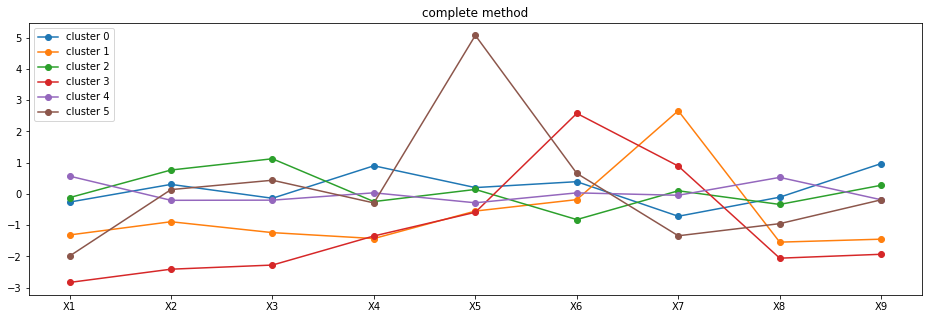

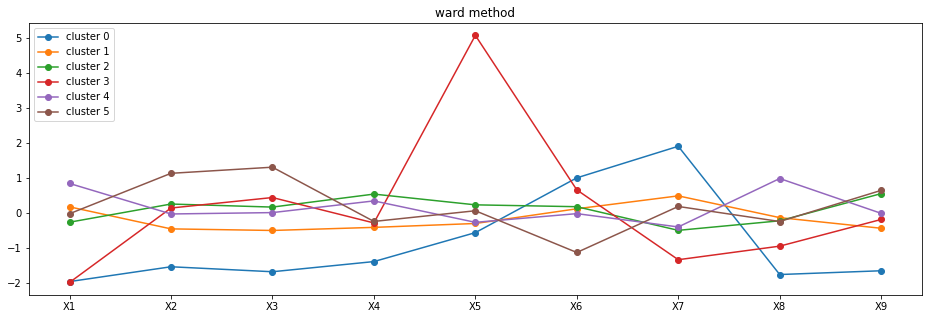

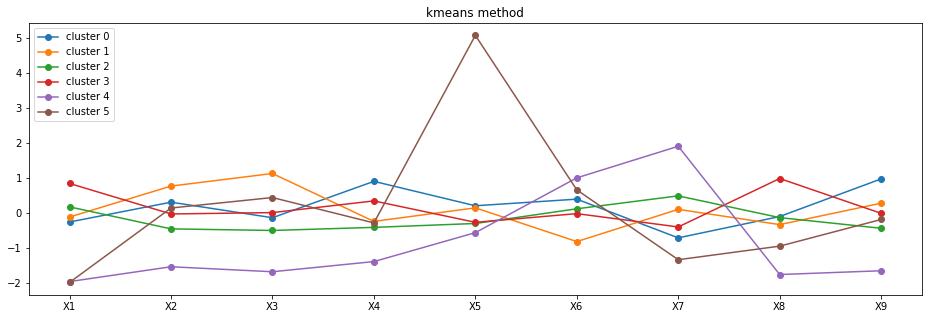

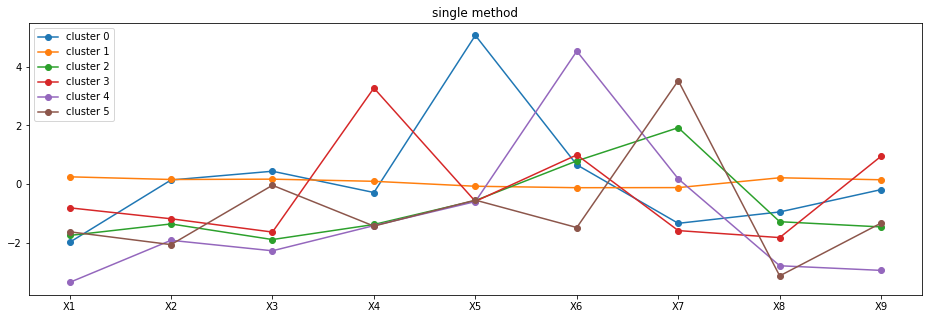

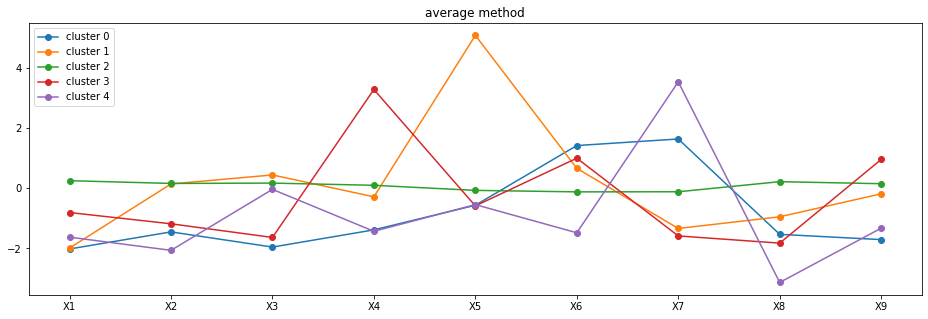

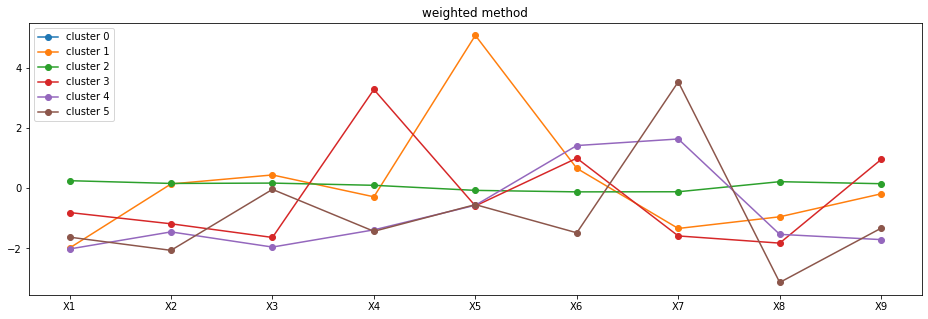

In [27]:
for method in CLUSTER_METHODS:
    cur_mean = means[method] 
    plt.figure(figsize=(16,5))
   #для каждого кластера из данного метода строим график
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1], marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') #легенда графика
    plt.title('{} method'.format(cur_mean.index[1][:-2])) #название 


## 8. Выгрузка элементов в кластерах.

In [28]:

cluster_dict = {}

for method, n in N_CLUSTERS.items():
     #выводим заголовки методов
    print('{} method\n'.format(method)) 
    #для каждого кластера проходимся по объектам и записываем их в словарь
    for i in range(n): 
        cluster_dict['{}_{}'.format(method, i)] = scaled[scaled[method]==i][features]
                
        #выводим на экран состав кластеров
        print ('Состав кластера {}: {}'.format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')


complete method

Состав кластера 0: ['г. Москва' 'г. Санкт-Петербург' 'г. Севастополь'
 'Калининградская область' 'Красноярский край' 'Ленинградская область'
 'Московская область' 'Мурманская область' 'Приморский край'
 'Республика Татарстан' 'Самарская область' 'Свердловская область '
 'Тюменская область' 'Хабаровский край '
 'Ханты-Мансийский автоном-ный округ – Югра']
Состав кластера 1: ['Кабардино-Балкарская \nРеспублика' 'Карачаево-Черкесская Республика'
 'Республика Калмыкия' 'Республика Тыва']
Состав кластера 2: ['Амурская область' 'Волгоградская область' 'Еврейская автономная область'
 'Забайкальский край' 'Иркутская область' 'Камчатский край'
 'Кемеровская область' 'Кировская область' 'Курганская область'
 'Магаданская область' 'Новосибирская область ' 'Оренбургская область'
 'Республика Алтай' 'Республика Бурятия' 'Республика Коми'
 'Республика Саха (Якутия)' 'Сахалинская область' 'Томская область'
 'Чукотский автономный округ']
Состав кластера 3: ['Республика Дагестан' 'Респ

## 9. Функционал качества разбиения

In [29]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
#def Q - функционал качества разбиения для конкретного кластера в методе
#method_num – строки кластера, mean_data_row – строка со средними значениями признаков для данного кластера    
def Q(method_num, mean_data_row):
    q = 0 
    #Проходимся по каждому элементу кластера
    for i in range(len(method_num)): 
        t=0
        #Проходим по каждому признаку, считаем сумму квадратов расстояний от значения объекта до центра кластера (координаты центра кластера – переменная mean_data_row)
        for j, feature in zip(range(len(features)), features):
            t += (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
        q += t
    return q


Q_dict = {}
k = 0
for method in N_CLUSTERS.keys():
    t = 0
    for n in range(N_CLUSTERS[method]):
        t += Q(cluster_dict['{}_{}'.format(method, n)], pd.DataFrame(mean_data.iloc[k]).T)
        k += 1   
    Q_dict['Q_{}'.format(method)]=round(t, 3)
Q_dict    
#функционалы качества могут не совпадать в с вашими, так как питон может немного по другому кластеризовывать регионы




{'Q_complete': 381.317,
 'Q_ward': 383.148,
 'Q_kmeans': 372.899,
 'Q_single': 460.287,
 'Q_average': 480.73,
 'Q_weighted': 480.73}